# Test Pulse Rate features in opensoundscape dev branch

In [174]:
import numpy as np
import sys
sys.path.append("..")
from opensoundscape.pulse_finder import pulse_finder, pulse_finder_species_set, summarize_top_scores
from glob import glob
import os
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import random
# from opensoundscape.make_clips import extract_clip_from_file

In [175]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [176]:
plt.rcParams['figure.figsize']=[20,10]

In [177]:
from opensoundscape.spectrogram import Spectrogram
from opensoundscape.audio import Audio

In [181]:
Audio("../tests/silence_10s.mp3", max_duration=5)

AttributeError: 'PosixPath' object has no attribute 'encode'

In [143]:
path = '../tests/great_plains_toad.wav'
audio = Audio(path)
spec = Spectrogram.from_audio(audio)


peak freq: 7.738494873046876


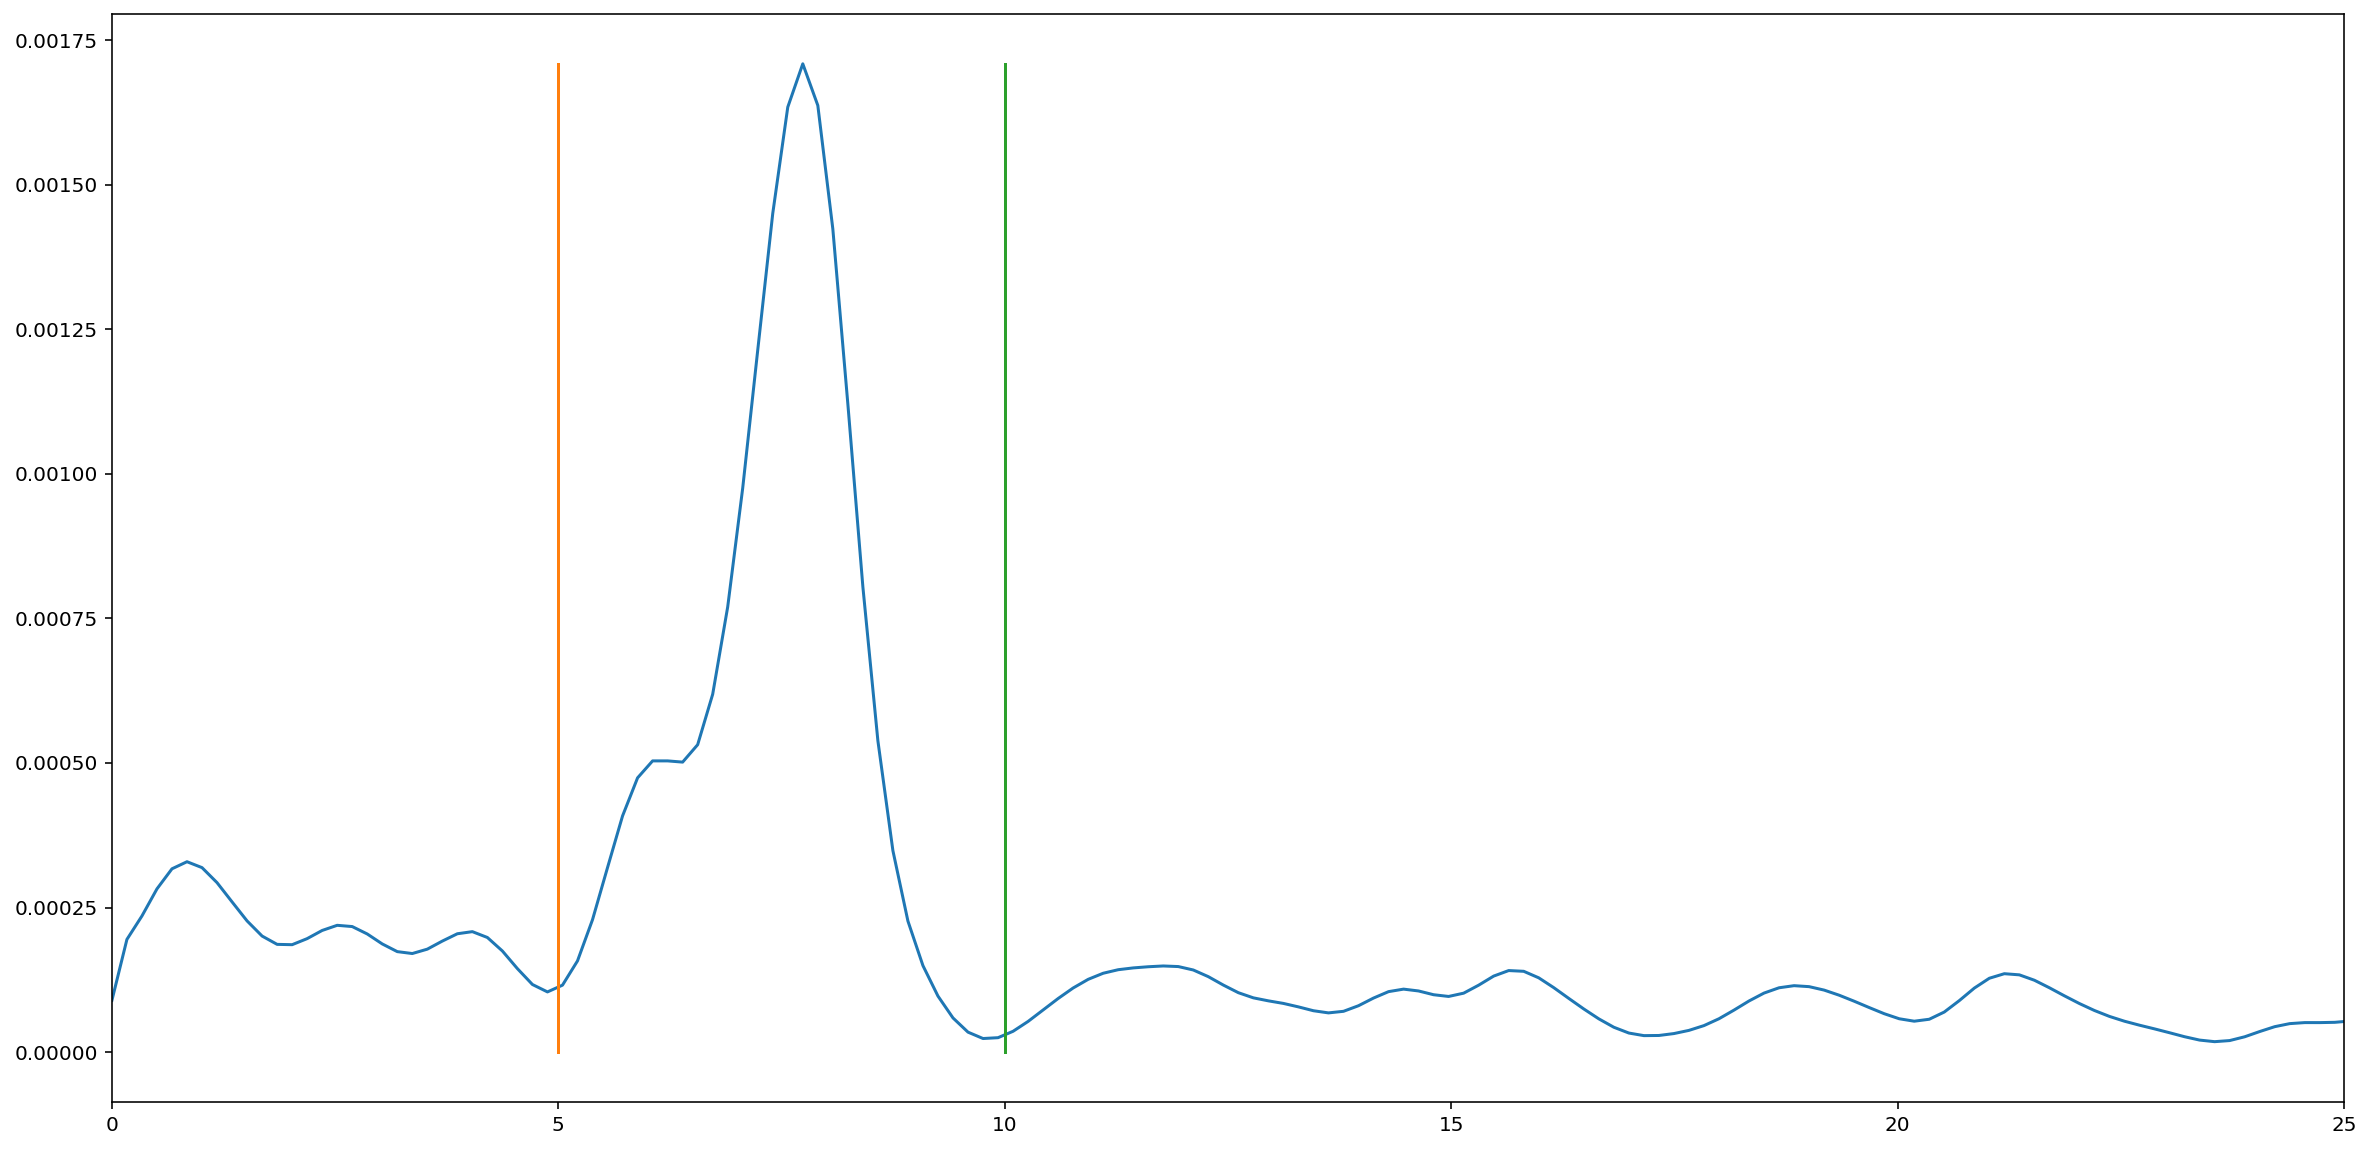

peak freq: 8.243179321289064


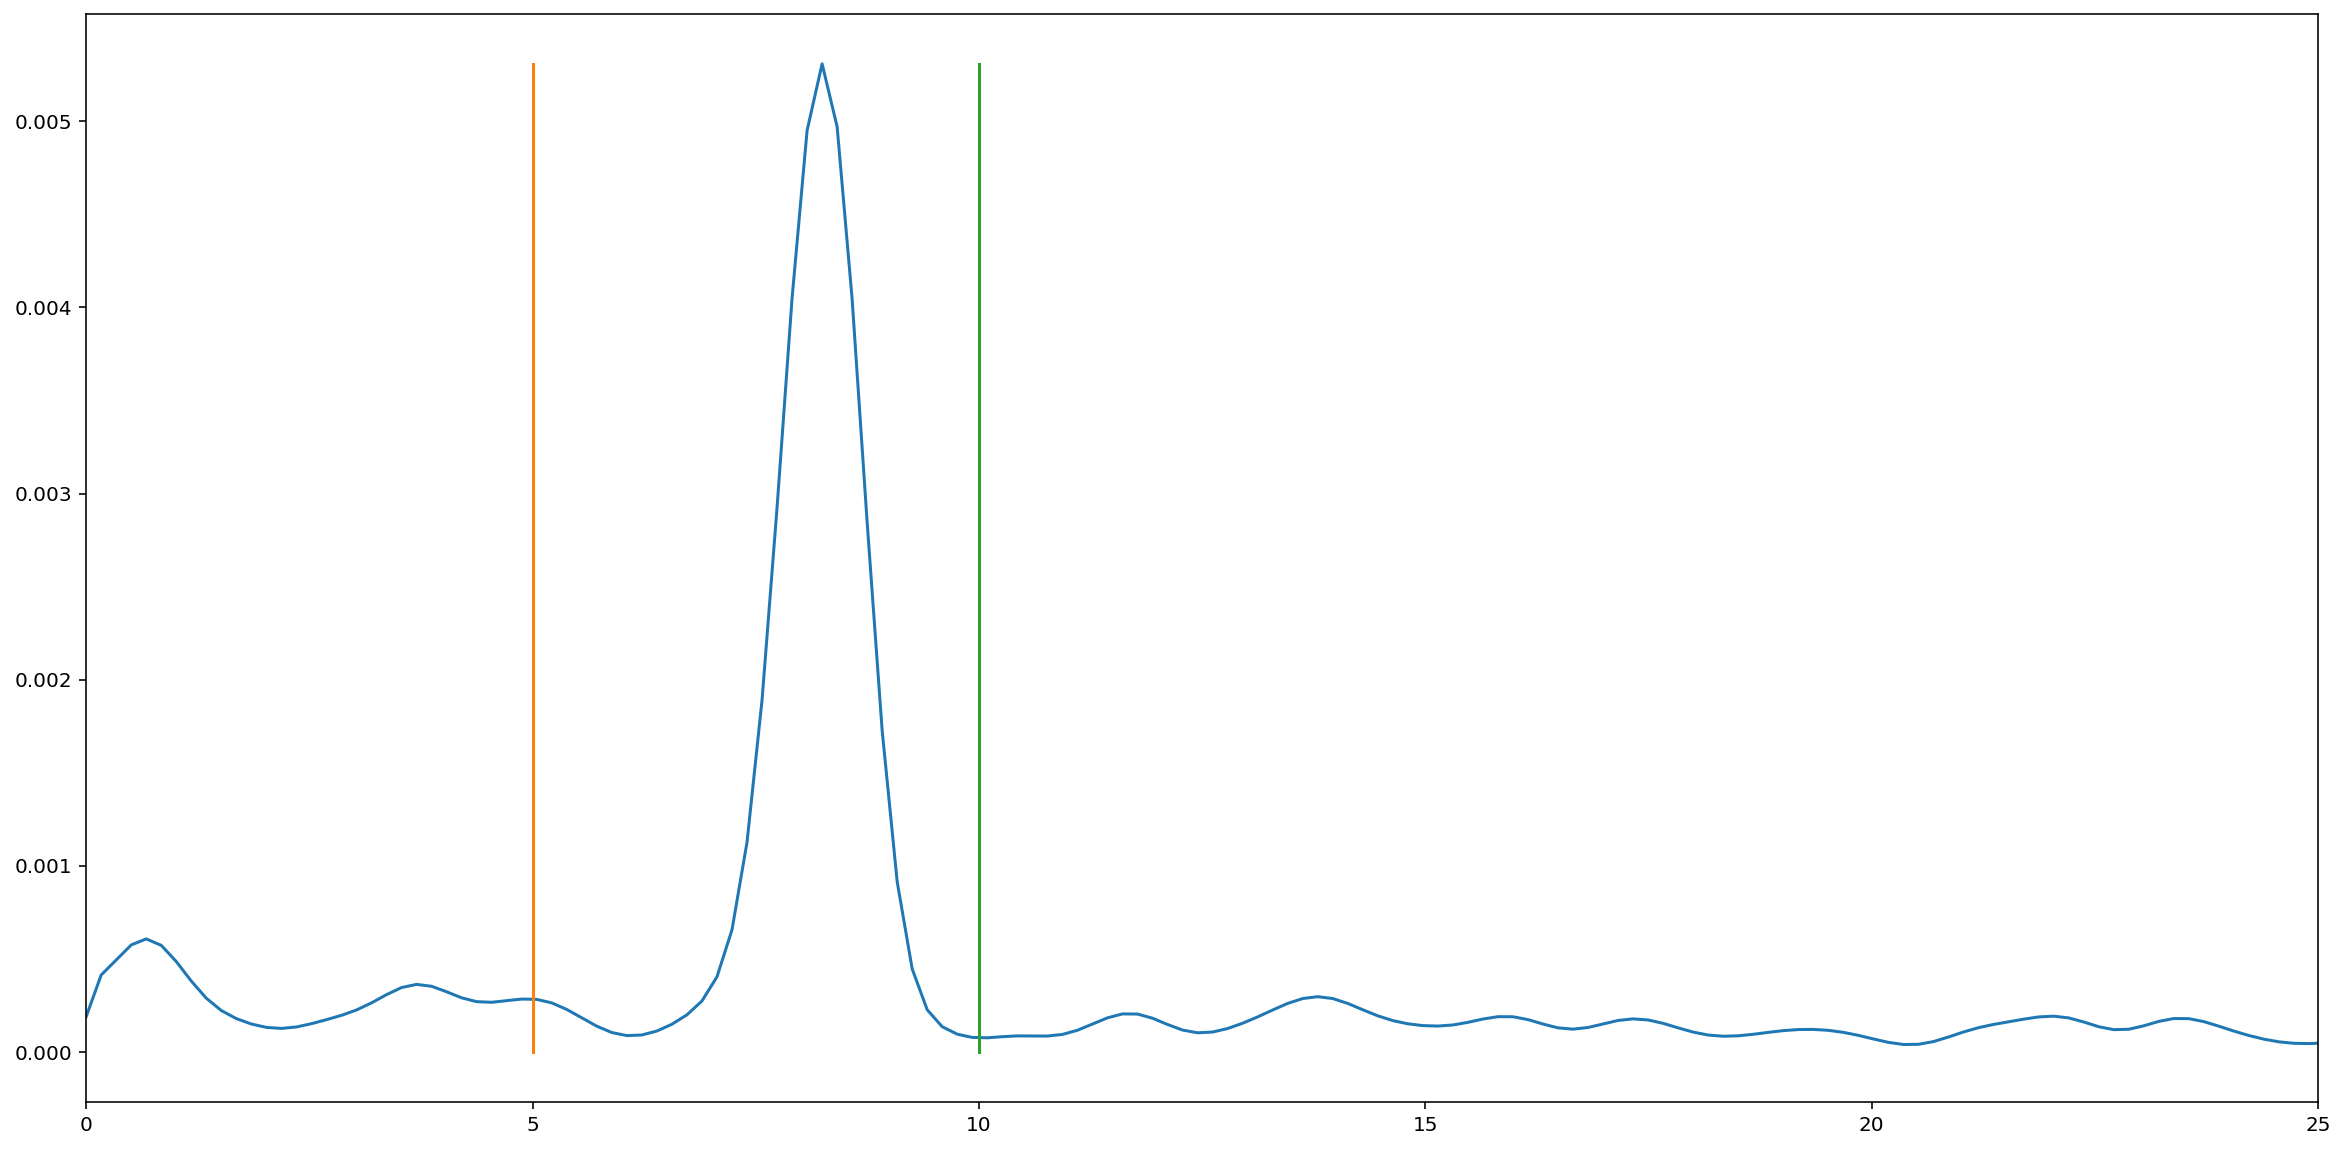

peak freq: 8.411407470703127


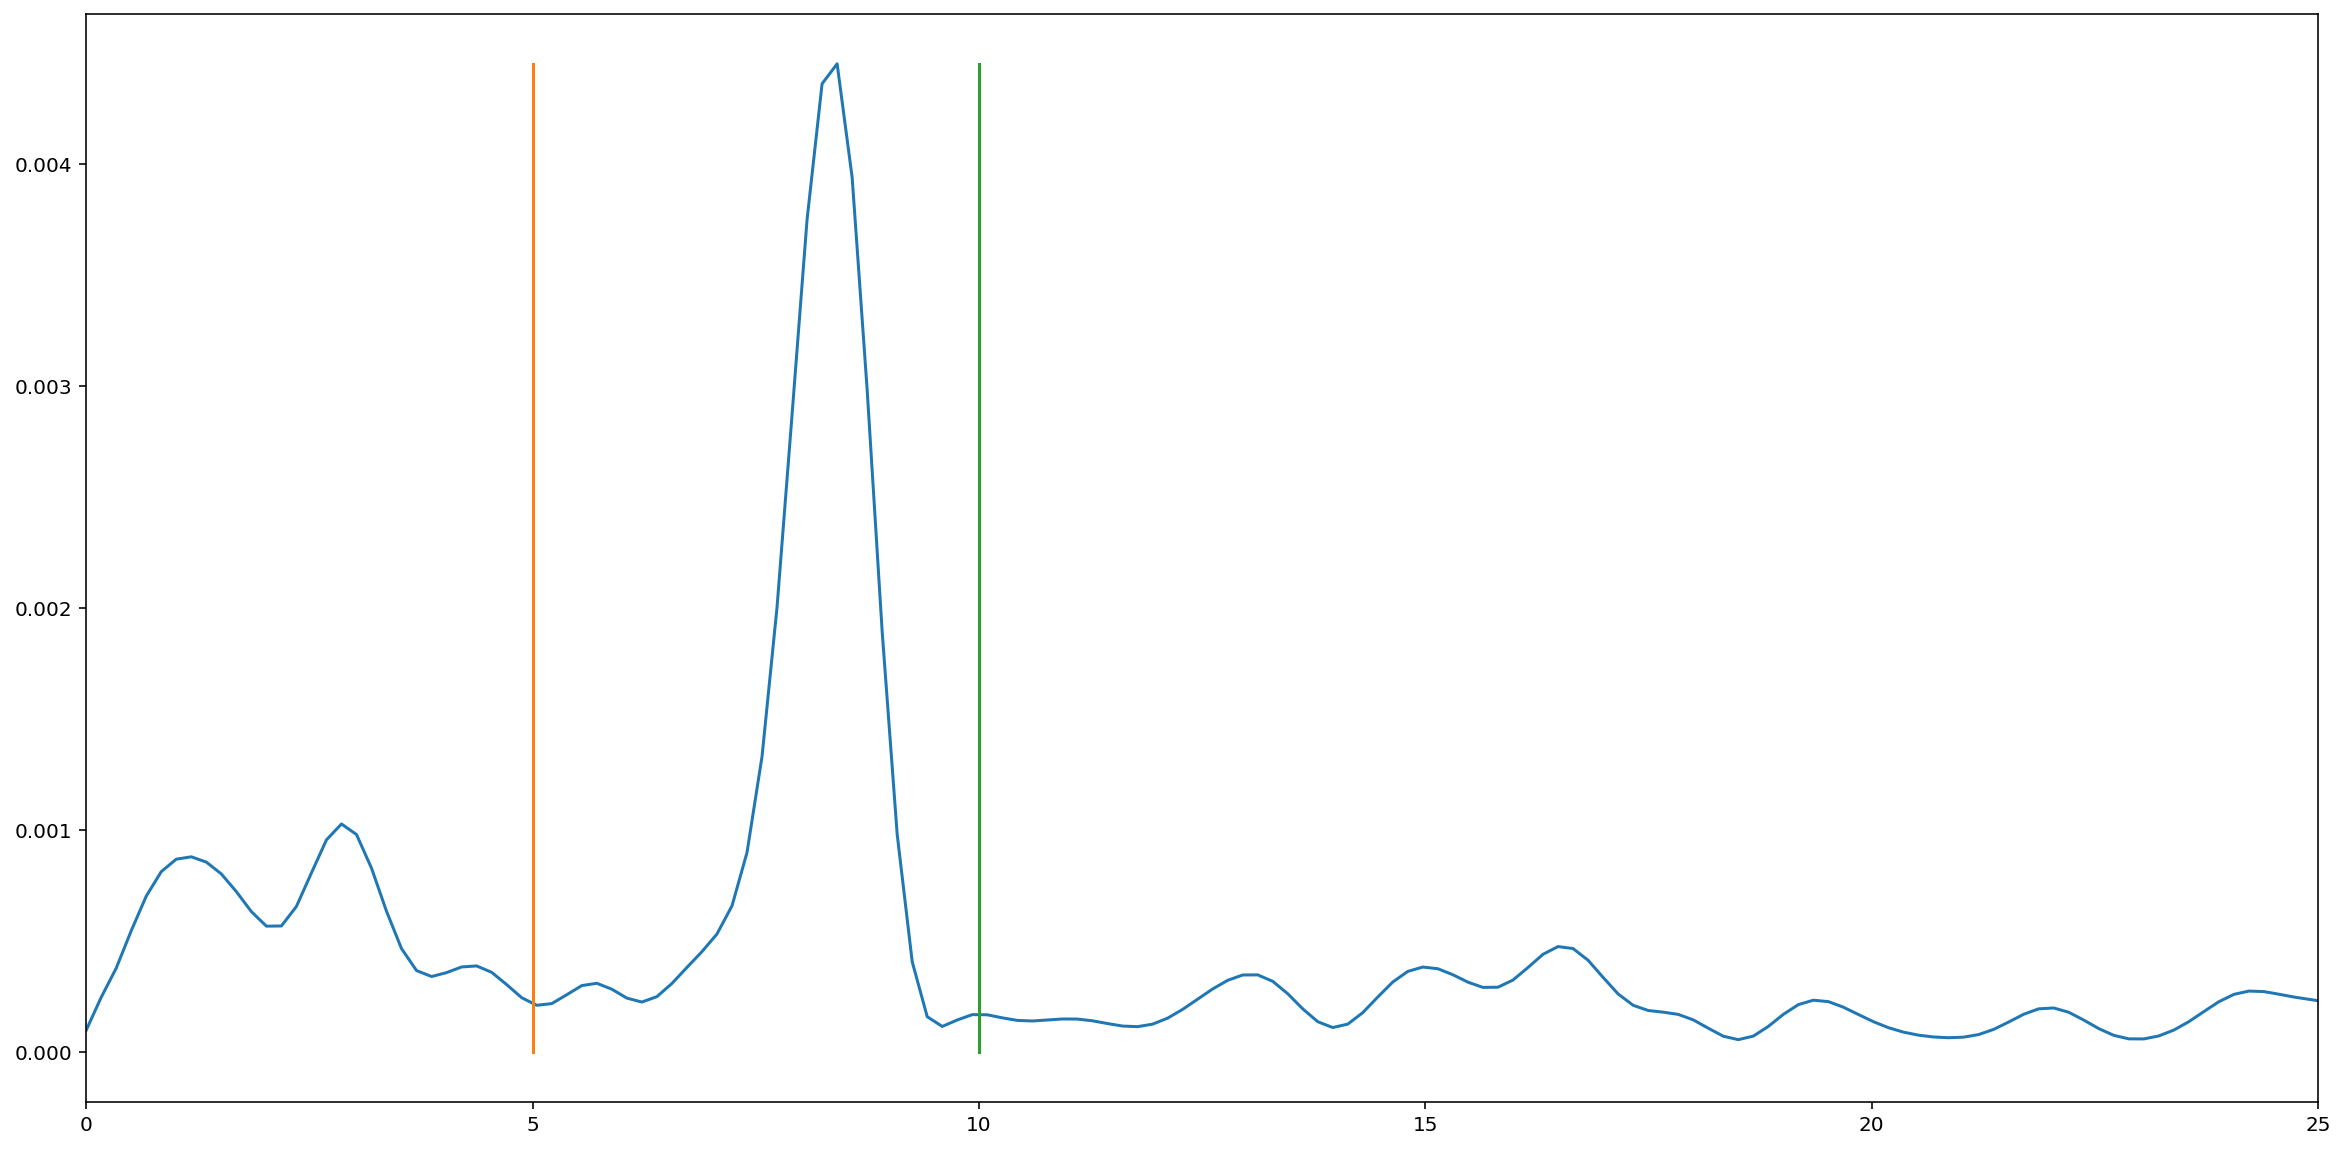

peak freq: 8.411407470703127


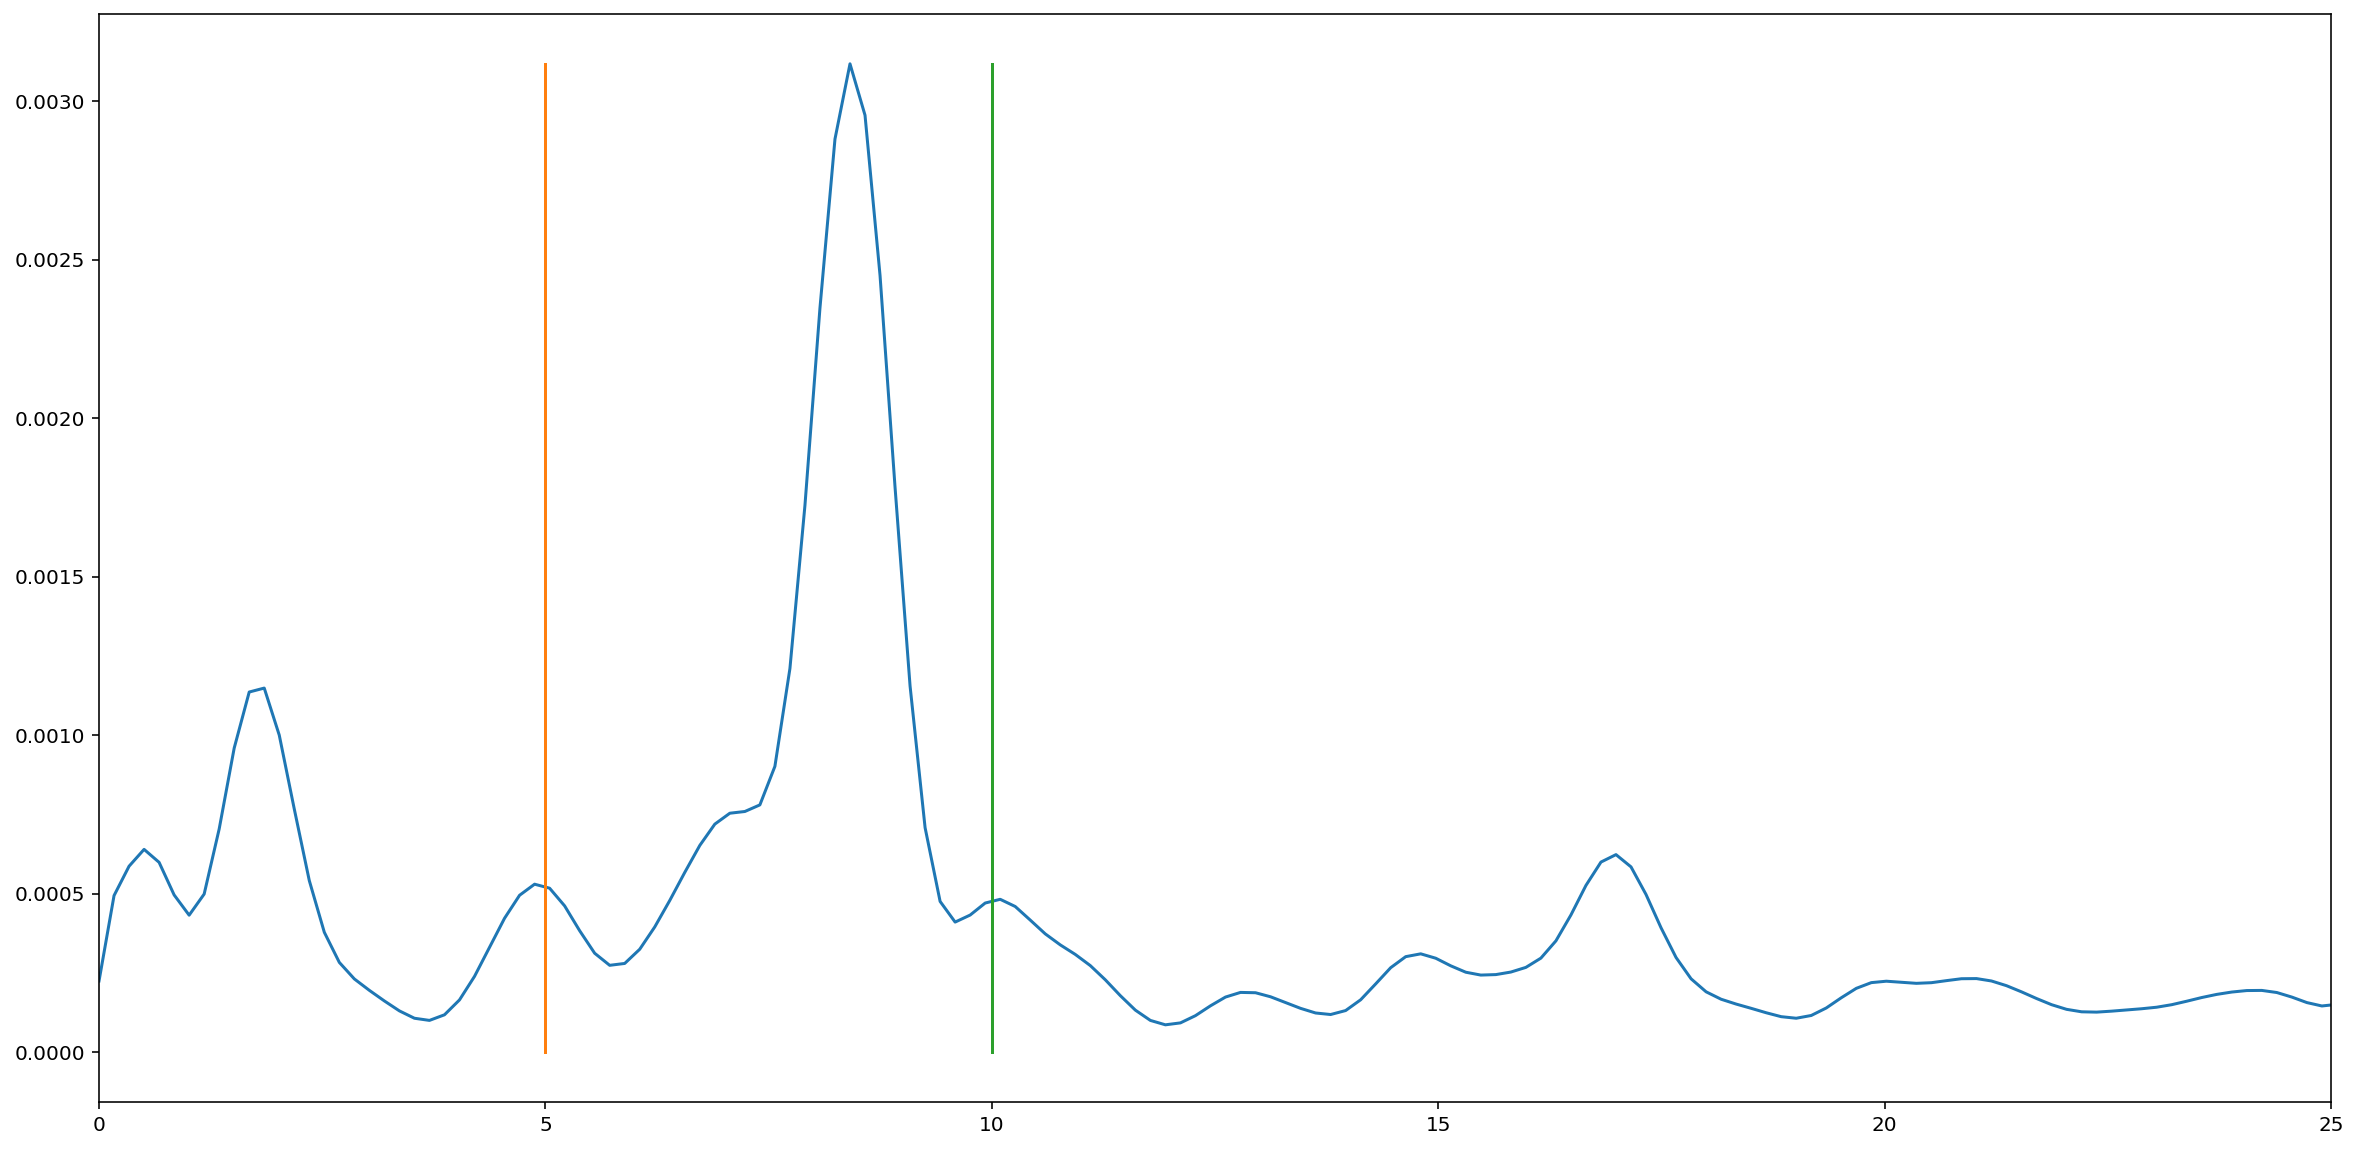

peak freq: 8.243179321289064


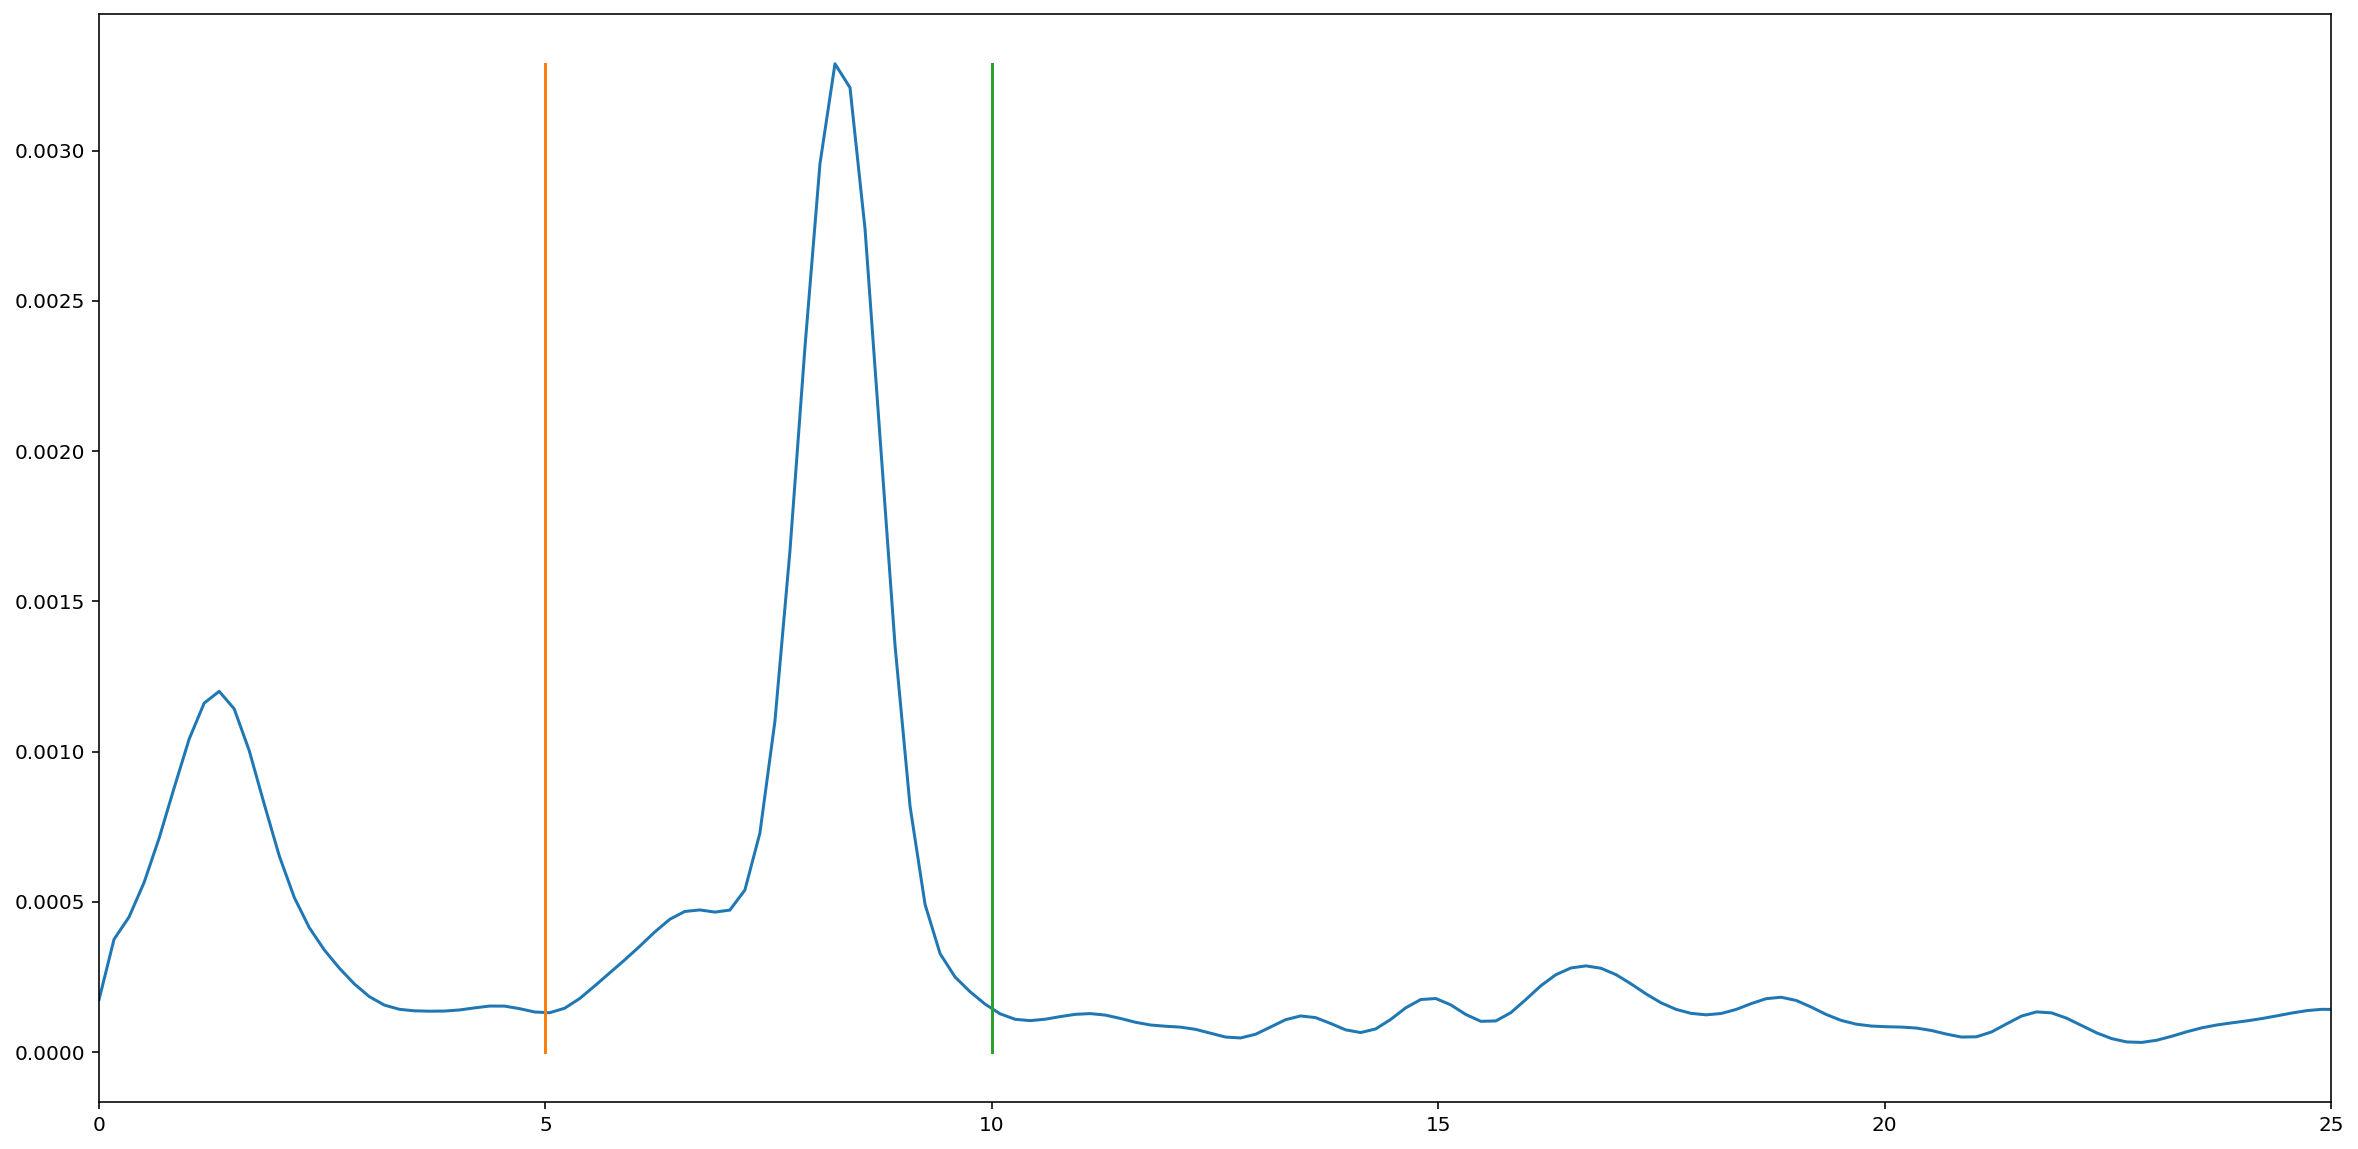

peak freq: 7.906723022460938


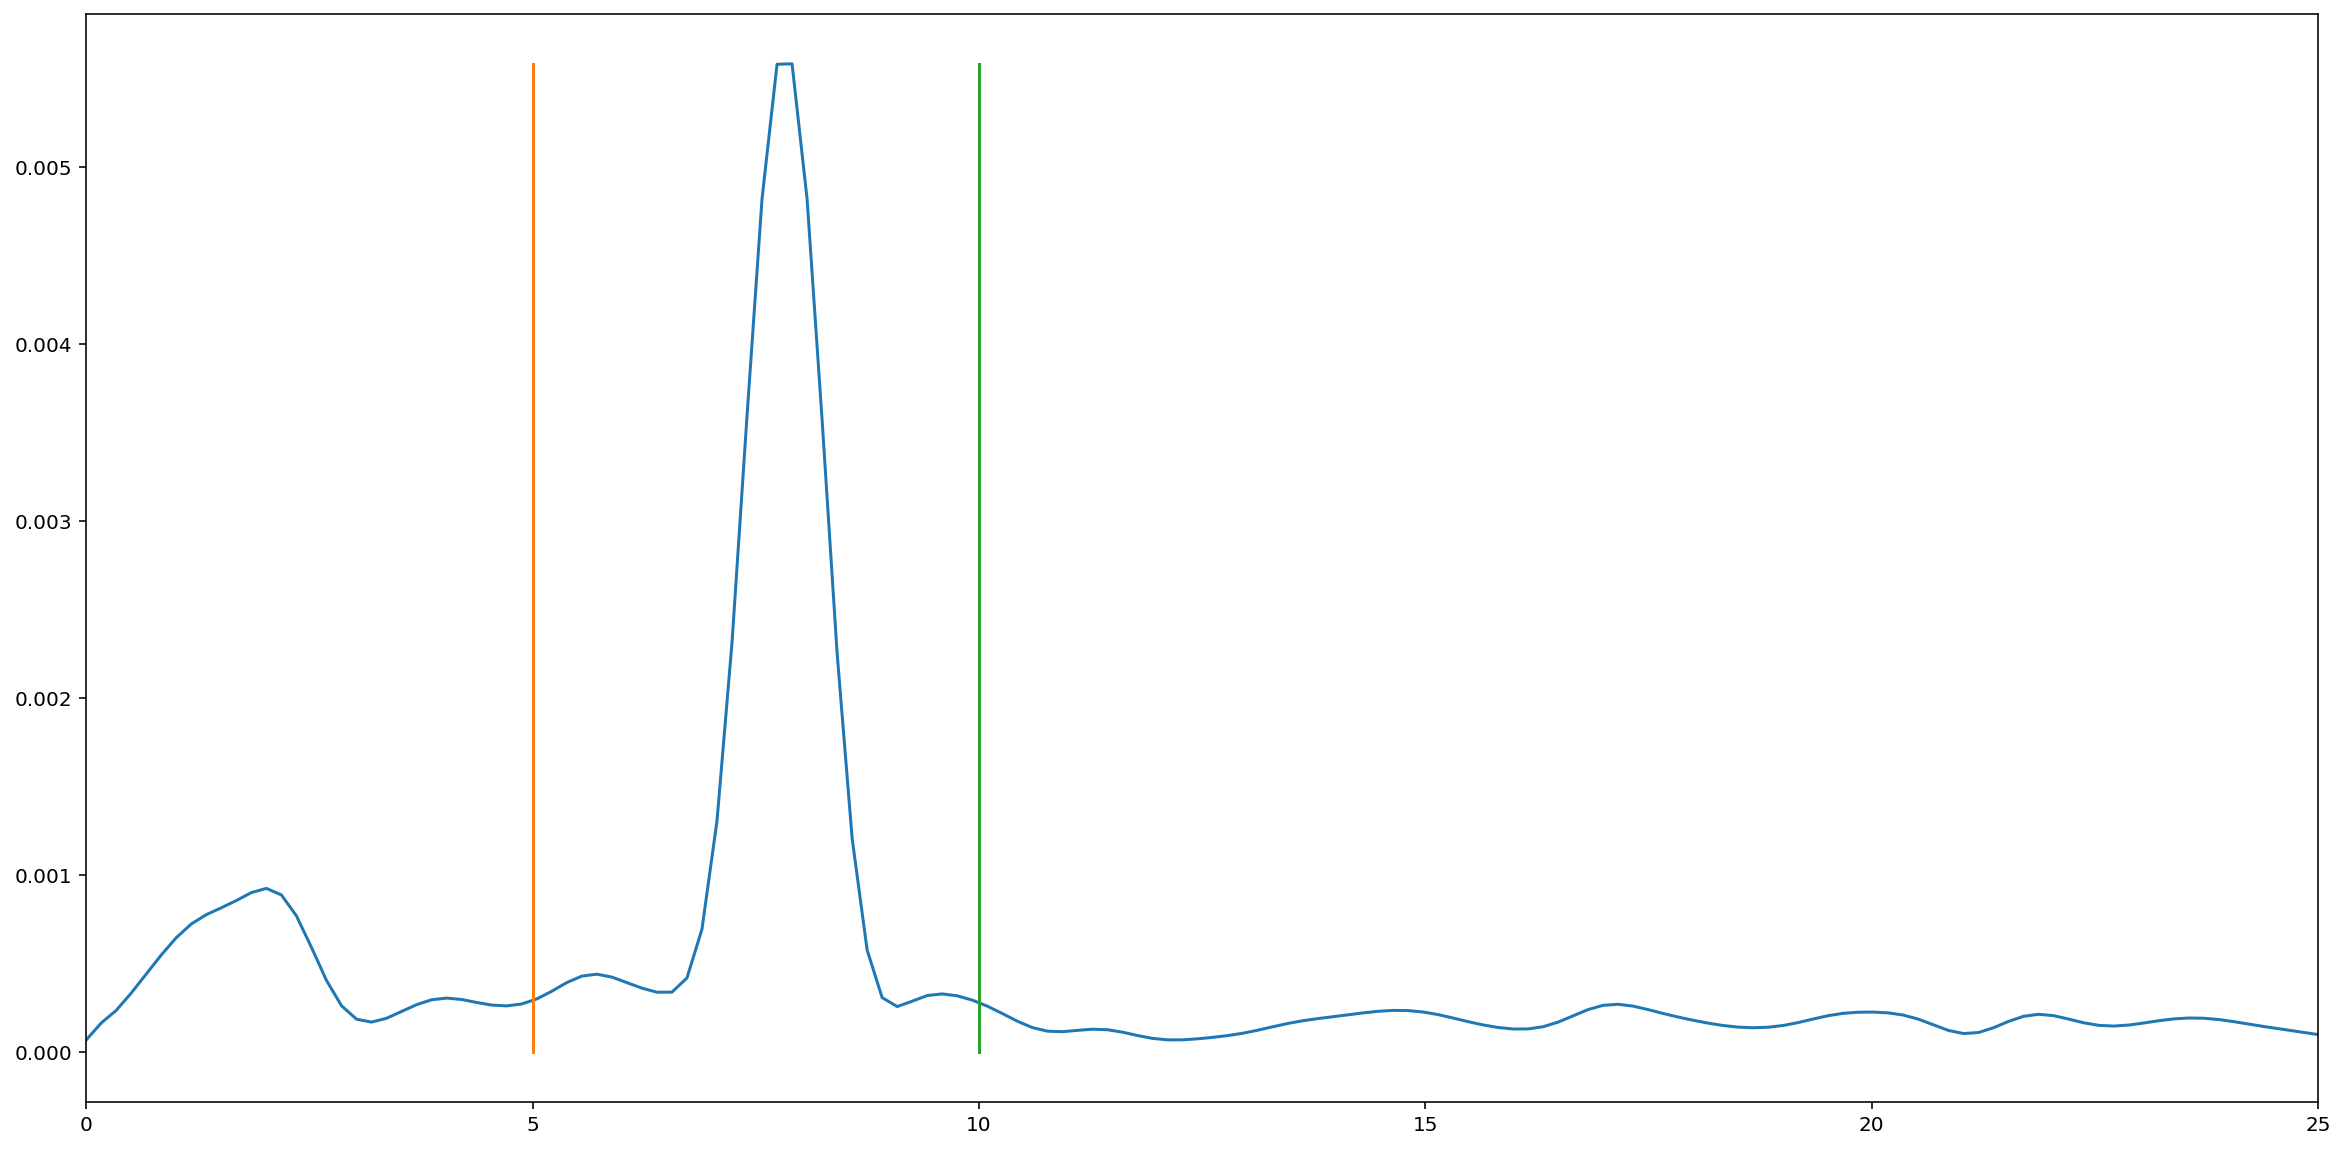

peak freq: 8.074951171875002


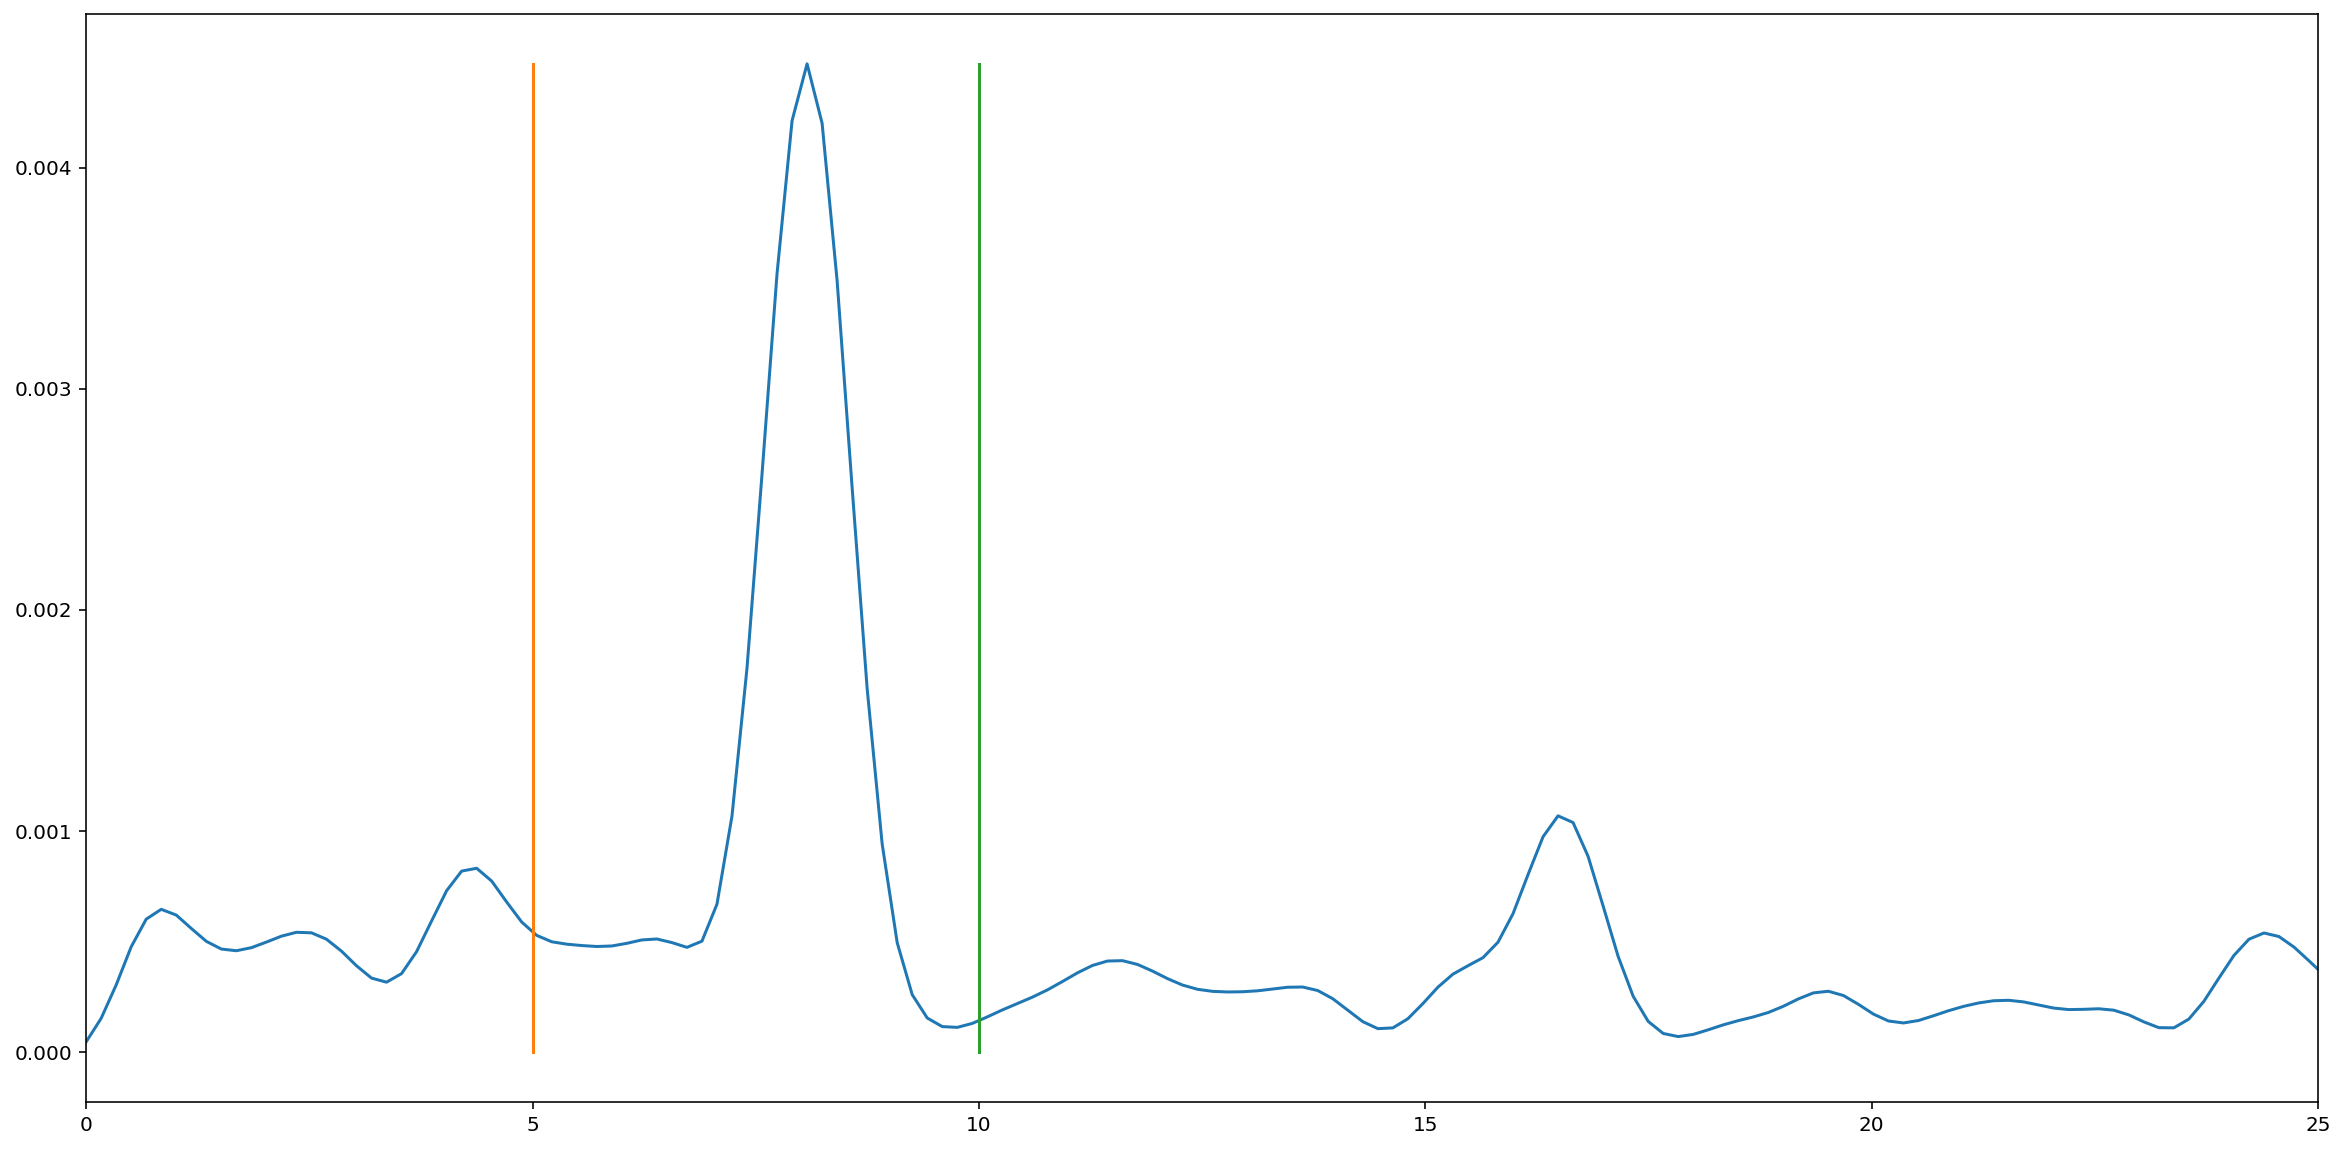

peak freq: 7.906723022460938


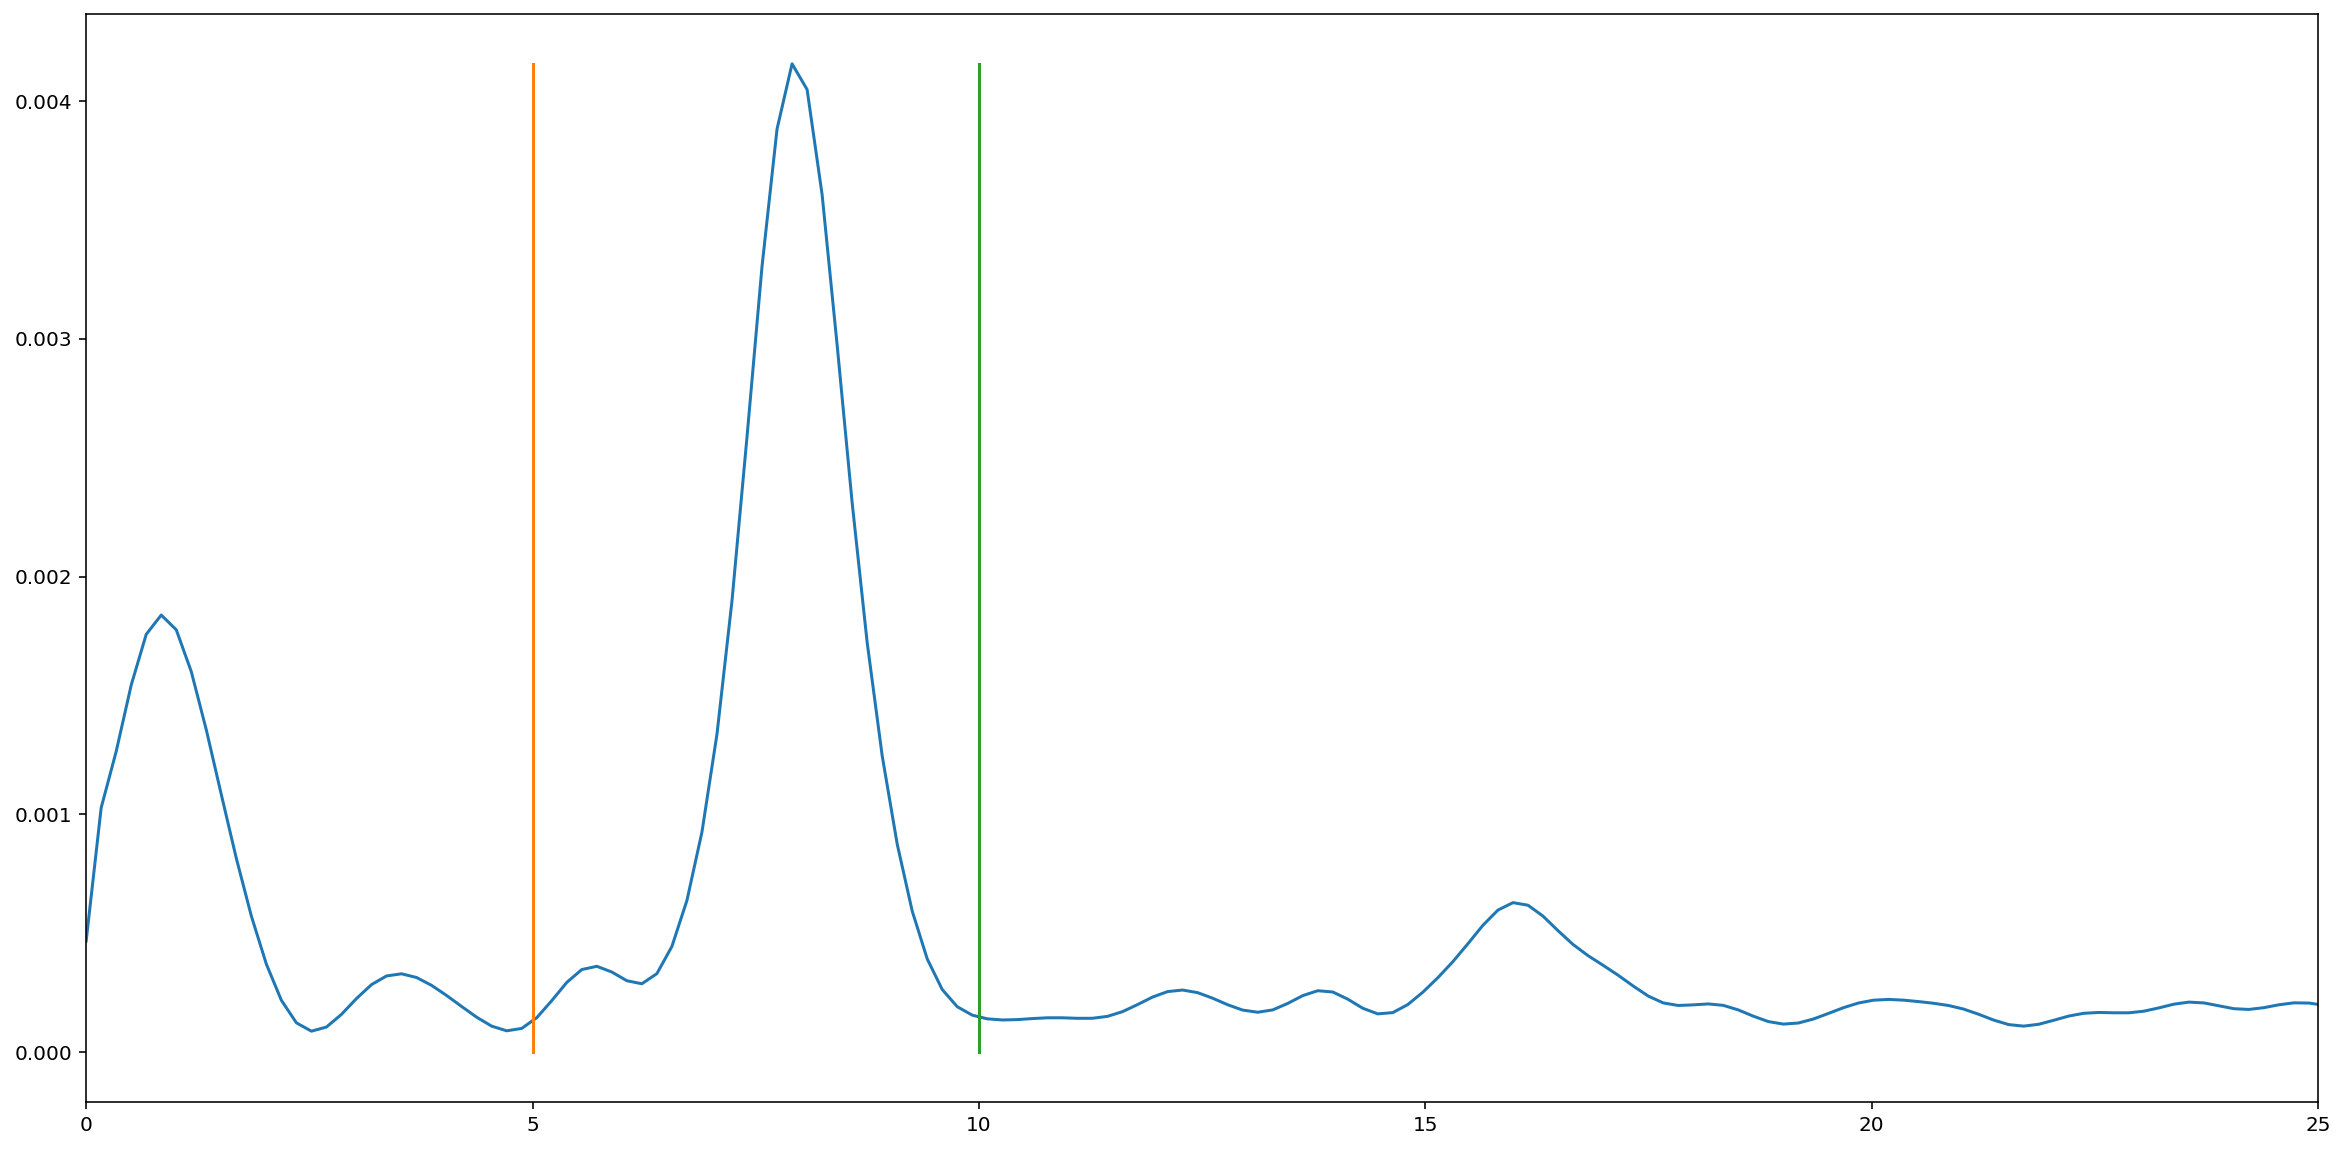

peak freq: 0.8411407470703126


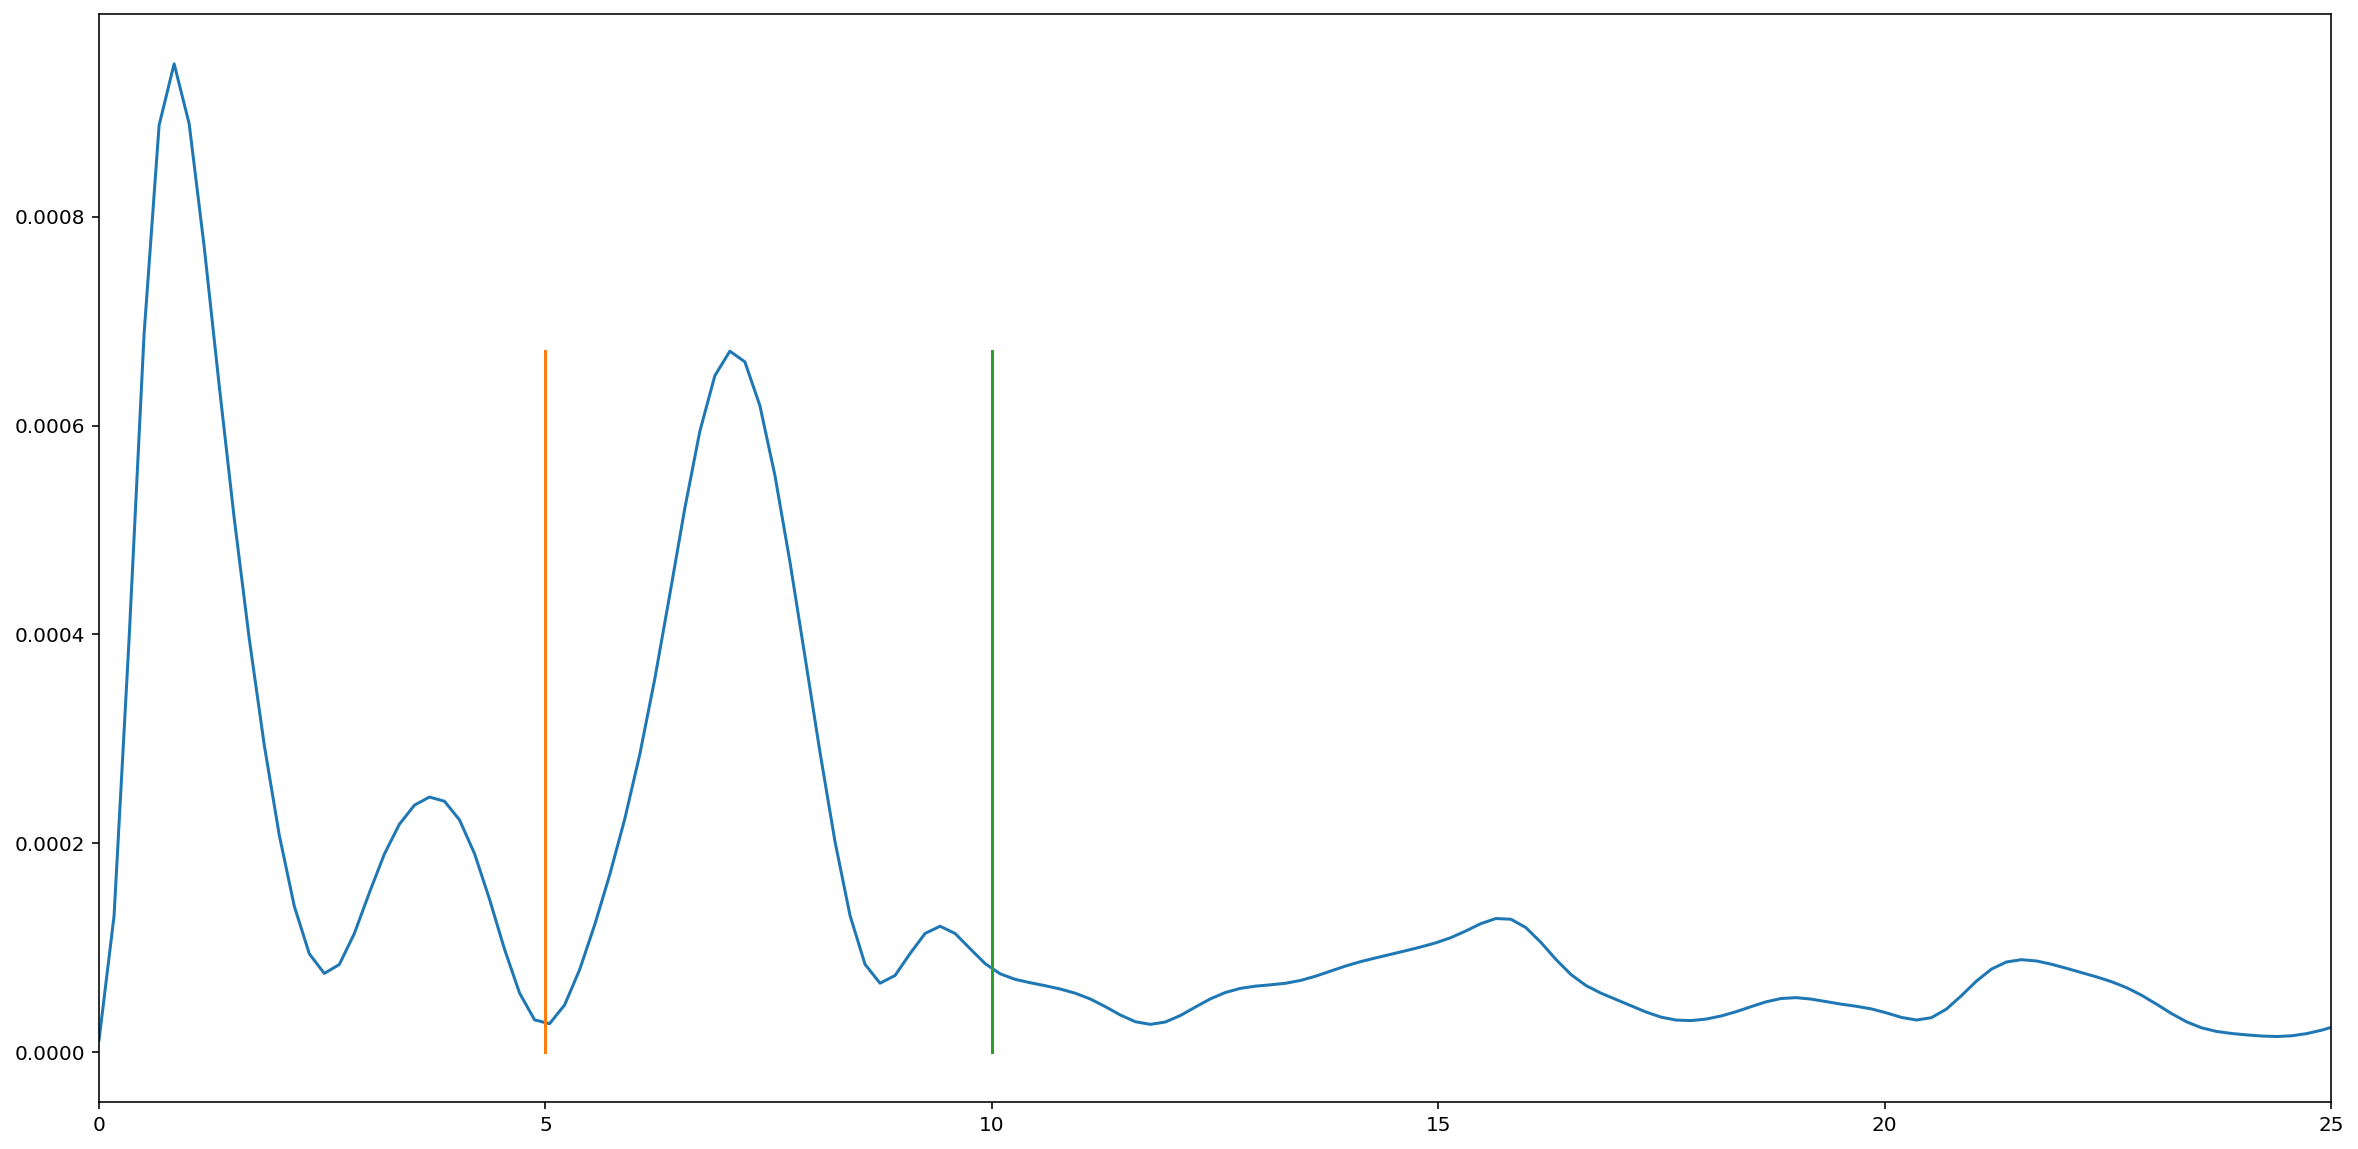

In [119]:
scores, times =  pulse_finder(spec,
                 pulserate_range=[5,10],
                 freq_range=[1000,2000],
                 window_len=5.0,
                 rejection_bands=[[0,200]],
                 plot=True)

In [116]:
Spectrogram(np.zeros((5, 10)), np.linspace(0,100,5), np.linspace(0,10,10)).net_power_signal([50,100],[[0,10],[20,30]])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

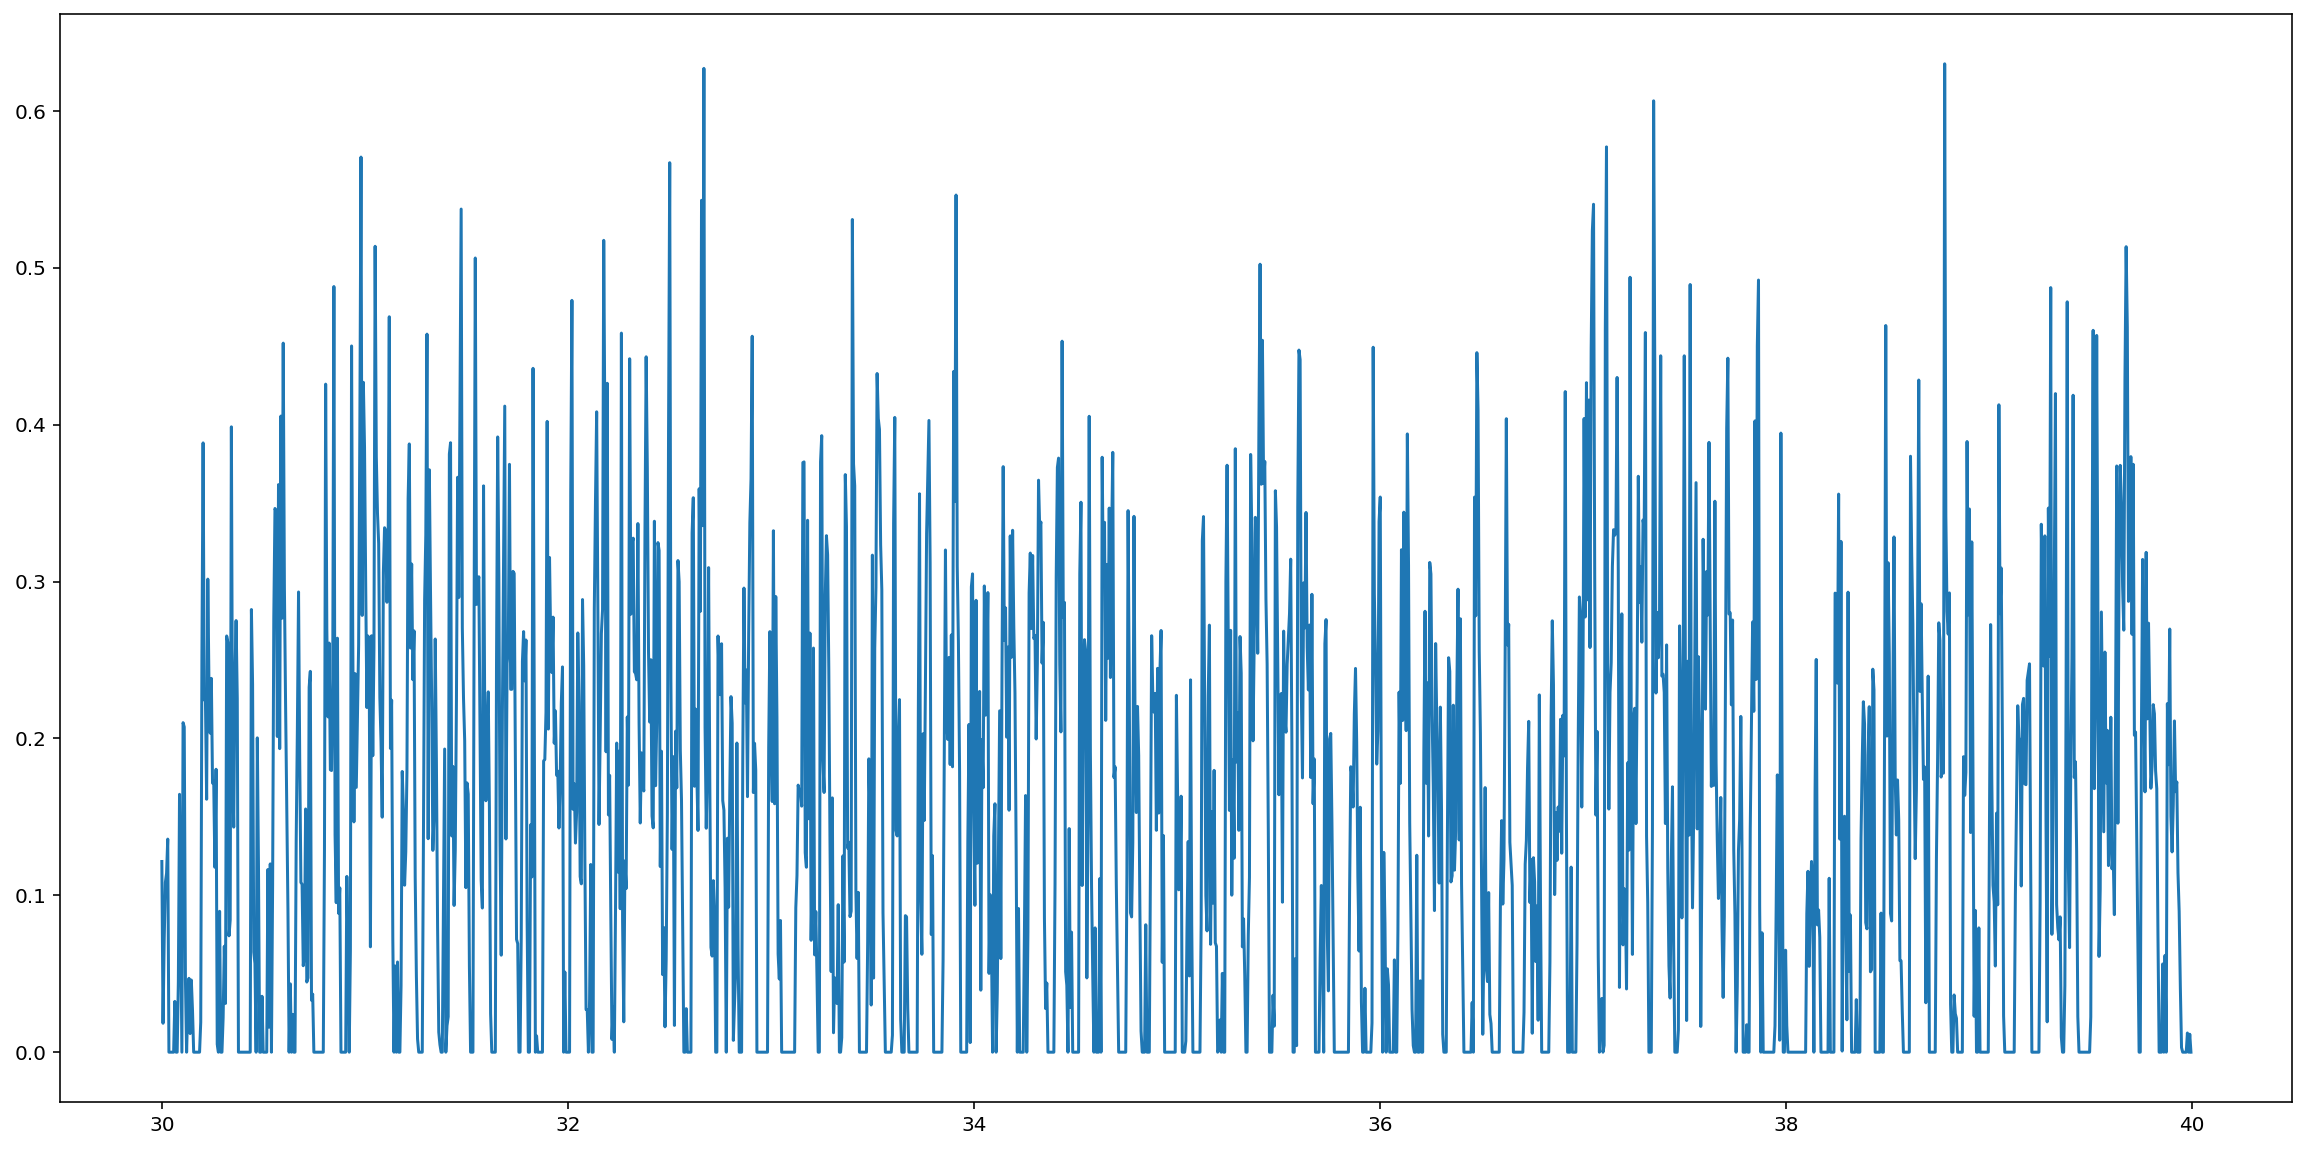

In [90]:
spec = spec.trim([30,40])
plt.plot(spec.times,spec.net_power_signal([1000,2000],[[0,200]]))

In [150]:
import pandas as pd

In [159]:
import os

[autoreload of opensoundscape.audio failed: Traceback (most recent call last):
  File "/Users/sml161/Library/Caches/pypoetry/virtualenvs/opensoundscape-6-tAnDaV-py3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/sml161/Library/Caches/pypoetry/virtualenvs/opensoundscape-6-tAnDaV-py3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/sml161/Library/Caches/pypoetry/virtualenvs/opensoundscape-6-tAnDaV-py3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/Users/sml161/Library/Caches/pypoetry/virtualenvs/opensoundscape-6-tAnDaV-py3.7/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_class
    update_instances(old, new)
  File "/Users/sml161/Library/Caches/pypoetry/virtualenvs/opensoundscape-6-tAnDaV-py3.7/l

In [163]:
from matplotlib import pyplot as plt

In [164]:
bool(os.environ.get('DISPLAY', None))

False

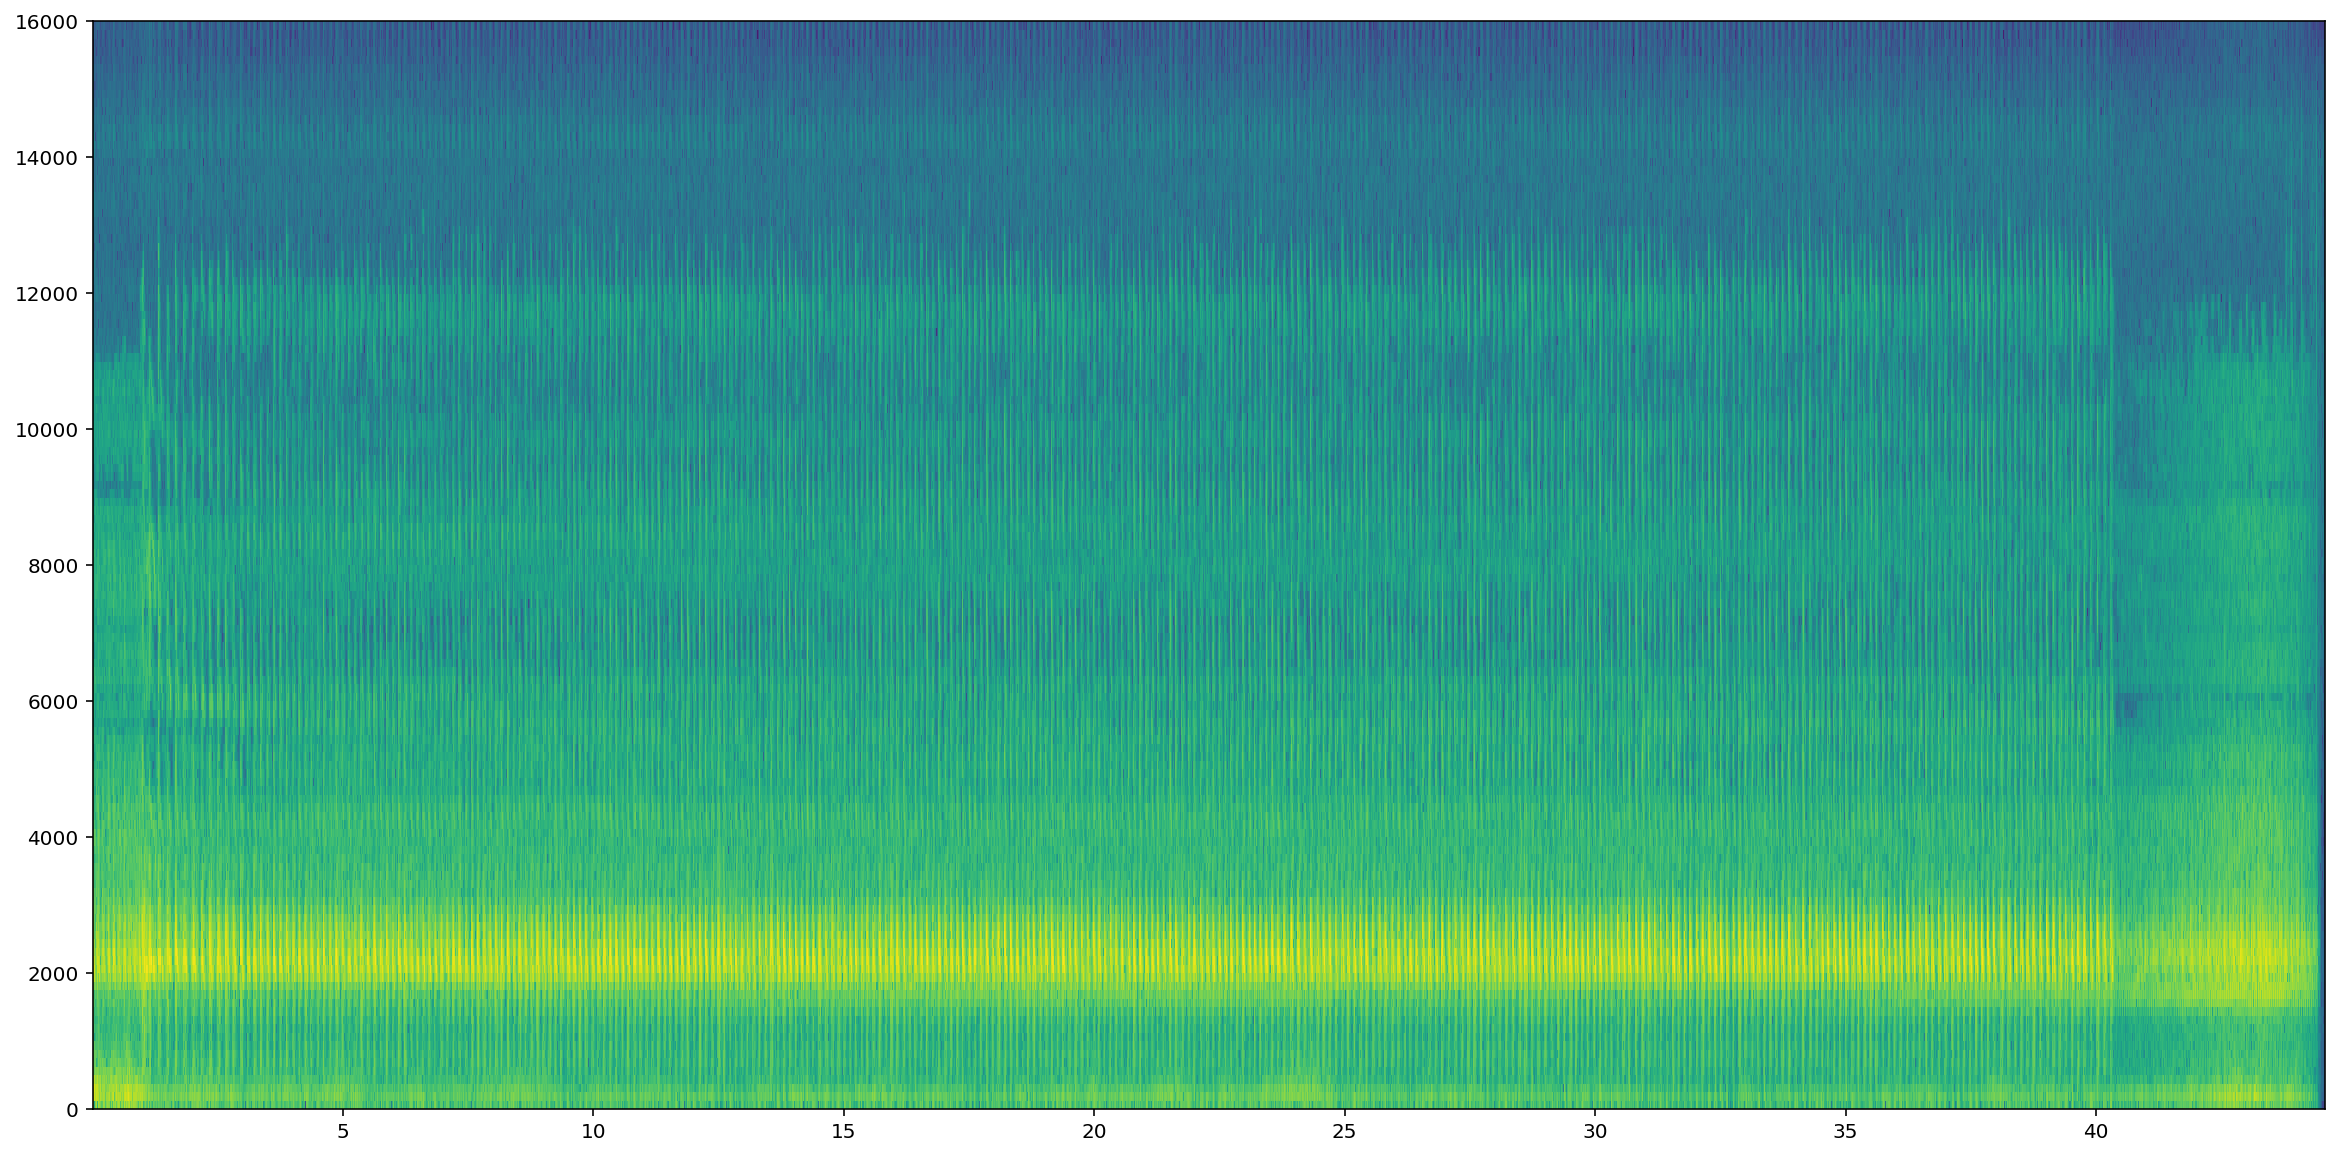

In [171]:
spec.plot()

In [155]:
df = pd.DataFrame(columns=["pulse_rate_low","pulse_rate_high","low_f","high_f", "reject_low", "reject_high", "window_length"])
df.at["sp1",:] = [5,10,1000,2000,0,500,1.0]
df.at["sp2",:] = [10,15,1000,2000,0,500,1.0]

audio = Audio(path,sample_rate=32000)
spec = Spectrogram.from_audio(audio,segment_length=256)

pulse_finder_species_set(spec,df)

,pulse_rate_low,pulse_rate_high,low_f,high_f,reject_low,reject_high,window_length,score,t,max_score,time_of_max_score
sp1,5,10,1000,2000,0,500,1,"[1.0728865263857638e-14, 5.165172069267881e-05...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",0.00027,28.0
sp2,10,15,1000,2000,0,500,1,"[7.886074814773582e-15, 1.0485226806088967e-05...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",0.00009,9.0
